In [1]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.linear_model import Perceptron

iris = load_iris(as_frame=True)
X = iris.data[['petal length (cm)','petal width (cm)']].values
y = (iris.target == 0)

per_clf = Perceptron(random_state=42)
per_clf.fit(X,y)

X_new = [[2,0.5],[3,1]]
y_pred = per_clf.predict(X_new)

In [2]:
from sklearn.datasets import fetch_california_housing
from sklearn.metrics import root_mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPRegressor
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

housing = fetch_california_housing()
X_train_full,X_test,y_train_full,y_test = train_test_split(housing.data,housing.target,random_state=42)
X_train,X_valid,y_train,y_valid = train_test_split(X_train_full,y_train_full,random_state=42)

mlp_reg = MLPRegressor(hidden_layer_sizes=[50,50,50],random_state=42)
pipeline = make_pipeline(StandardScaler(),mlp_reg)
pipeline.fit(X_train,y_train)
y_pred = pipeline.predict(X_valid)
rmse = root_mean_squared_error(y_valid,y_pred)

In [3]:
rmse

0.505332665796845

In [4]:
import tensorflow as tf

fashion_mnist = tf.keras.datasets.fashion_mnist.load_data()
(X_train_full,y_train_full),(X_test,y_test) = fashion_mnist
X_train,y_train = X_train_full[:-5000],y_train_full[:-5000]
X_valid,y_valid = X_train_full[-5000:],y_train_full[-5000:]


In [5]:
X_train.shape

(55000, 28, 28)

In [6]:
y_train.dtype

dtype('uint8')

In [7]:
X_train,X_valid,X_test = X_train / 255.,X_valid/255.,X_test/255.

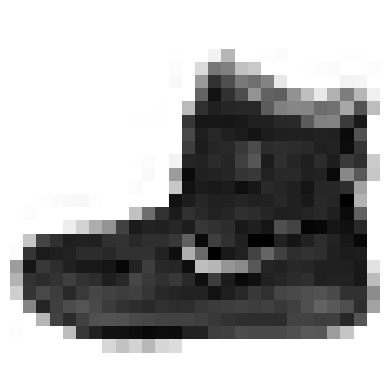

In [8]:
import matplotlib.pyplot as plt
plt.imshow(X_train[0], cmap="binary")
plt.axis('off')
plt.show()

In [9]:
y_train

array([9, 0, 0, ..., 9, 0, 2], shape=(55000,), dtype=uint8)

In [10]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
               "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

In [11]:
class_names[y_train[0]]

'Ankle boot'

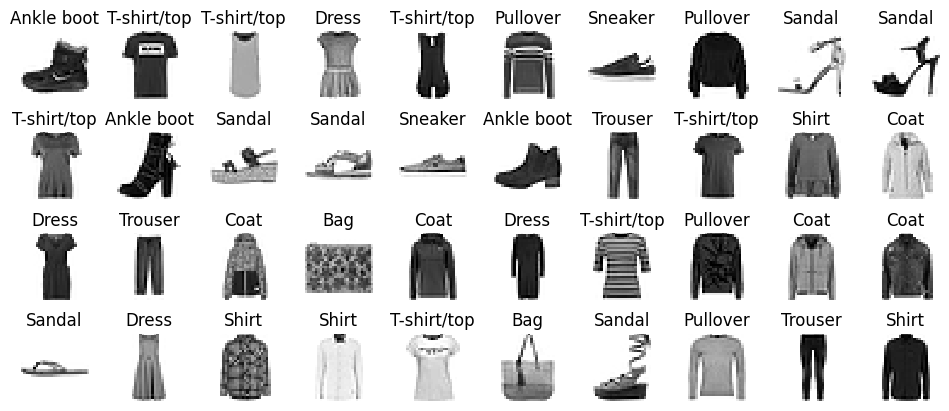

In [12]:
n_rows = 4
n_cols = 10
plt.figure(figsize=(n_cols * 1.2, n_rows * 1.2))
for row in range(n_rows):
    for col in range(n_cols):
        index = n_cols * row + col
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(X_train[index], cmap="binary", interpolation="nearest")
        plt.axis('off')
        plt.title(class_names[y_train[index]])
plt.subplots_adjust(wspace=0.2, hspace=0.5)

plt.show()

In [13]:
tf.random.set_seed(42)
model = tf.keras.Sequential()
model.add(tf.keras.layers.Input(shape=[28,28]))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(300,activation='relu'))
model.add(tf.keras.layers.Dense(100,activation='relu'))
model.add(tf.keras.layers.Dense(10,activation='softmax'))

In [14]:
tf.keras.backend.clear_session()
tf.random.set_seed(42)
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=[28, 28]),
    tf.keras.layers.Dense(300, activation="relu"),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(10, activation="softmax")
])

c:\Users\utkar\OneDrive\Desktop\Machine-learning-book\.ai\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [15]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 300)            │       235,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 100)            │        30,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 266,610 (1.02 MB)

 Trainable params: 266,610 (1.02 MB)

 Non-trainable params: 0 (0.00 B)

In [16]:
model.layers

[<Flatten name=flatten, built=True>,
 <Dense name=dense, built=True>,
 <Dense name=dense_1, built=True>,
 <Dense name=dense_2, built=True>]

In [17]:
hidden1 = model.layers[1]
hidden1.name

'dense'

In [18]:
model.get_layer('dense') is hidden1

True

In [19]:
weights,biases = hidden1.get_weights()
weights

array([[ 0.0366556 ,  0.0539082 ,  0.04116821, ...,  0.04651082,
        -0.03723427,  0.02075669],
       [ 0.05789733,  0.00225908,  0.05361119, ..., -0.05807627,
        -0.00251959, -0.01412235],
       [-0.02482193,  0.03773376,  0.03076532, ..., -0.03386536,
        -0.05711142, -0.03762098],
       ...,
       [ 0.03556909,  0.01596519, -0.03676614, ...,  0.06846659,
        -0.01251592,  0.01660102],
       [ 0.0261796 , -0.03579072,  0.02801546, ...,  0.07267614,
         0.02109654,  0.03584778],
       [-0.06630942,  0.06409609, -0.02926849, ...,  0.05318302,
         0.0261547 ,  0.04441507]], shape=(784, 300), dtype=float32)

In [20]:
weights.shape

(784, 300)

In [21]:
biases

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [22]:
biases.shape

(300,)

In [23]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=['accuracy'])

In [24]:
history = model.fit(X_train,y_train,epochs=30,
                    validation_data=(X_valid,y_valid))

Epoch 1/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.7683 - loss: 0.7019 - val_accuracy: 0.8294 - val_loss: 0.5058
Epoch 2/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8309 - loss: 0.4877 - val_accuracy: 0.8420 - val_loss: 0.4547
Epoch 3/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8469 - loss: 0.4426 - val_accuracy: 0.8480 - val_loss: 0.4302
Epoch 4/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8551 - loss: 0.4151 - val_accuracy: 0.8476 - val_loss: 0.4172
Epoch 5/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8614 - loss: 0.3949 - val_accuracy: 0.8518 - val_loss: 0.4054
Epoch 6/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8671 - loss: 0.3789 - val_accuracy: 0.8546 - val_loss: 0.3960
Epoch 7/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8712 - loss: 0.3654 - val_accuracy: 0.8576 - val_loss: 0.3883
Epoch 8/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8754 - loss: 0.3535 - 

In [25]:
history.params

{'verbose': 'auto', 'epochs': 30, 'steps': 1719}

In [26]:
history.epoch

[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29]

In [27]:
history.history

{'accuracy': [0.7683091163635254,
  0.8309454321861267,
  0.8468727469444275,
  0.8550727367401123,
  0.8614181876182556,
  0.8671091198921204,
  0.871181845664978,
  0.8754181861877441,
  0.8781636357307434,
  0.8814908862113953,
  0.8841090798377991,
  0.8867999911308289,
  0.8893272876739502,
  0.8914181590080261,
  0.8935272693634033,
  0.895727276802063,
  0.8982363343238831,
  0.9002363681793213,
  0.9021454453468323,
  0.9044181704521179,
  0.9063454270362854,
  0.9077454805374146,
  0.9093090891838074,
  0.9107818007469177,
  0.9124545454978943,
  0.9143818020820618,
  0.9156363606452942,
  0.9172363877296448,
  0.9187454581260681,
  0.9203090667724609],
 'loss': [0.7019424438476562,
  0.48767247796058655,
  0.44260212779045105,
  0.4150908291339874,
  0.39488425850868225,
  0.37889009714126587,
  0.3653908371925354,
  0.35347360372543335,
  0.34290289878845215,
  0.3334111273288727,
  0.32455727458000183,
  0.3166361451148987,
  0.30914565920829773,
  0.3023516833782196,
  0.2

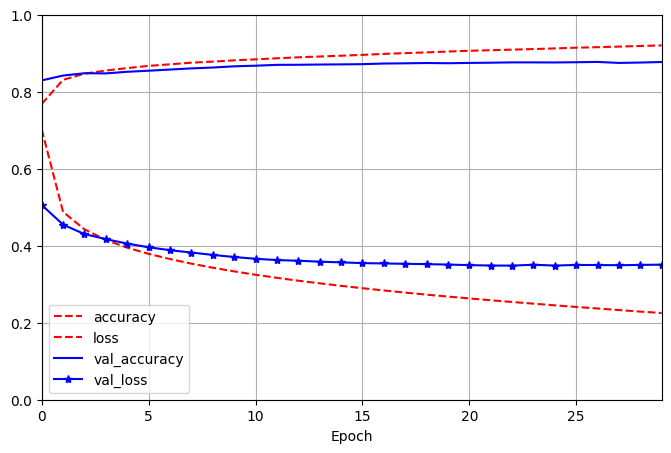

In [28]:
import matplotlib.pyplot as plt
import pandas as pd

pd.DataFrame(history.history).plot(
    figsize=(8,5),xlim=[0,29],ylim=[0,1],grid=True,xlabel='Epoch',
    style=["r--","r--","b-","b-*"]
)
plt.show()

In [29]:
model.evaluate(X_test,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8757 - loss: 0.3710


[0.37096282839775085, 0.8756999969482422]

In [30]:
X_new = X_test[:3]
y_proba = model.predict(X_new)
y_proba.round(2)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.15, 0.  , 0.01, 0.  , 0.83],
       [0.  , 0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ]],
      dtype=float32)

In [31]:
import numpy as np
y_pred = y_proba.argmax(axis=-1)
y_pred

array([9, 2, 1])

In [32]:
np.array(class_names)[y_pred]

array(['Ankle boot', 'Pullover', 'Trouser'], dtype='<U11')

In [33]:
y_new = y_test[:3]
y_new

array([9, 2, 1], dtype=uint8)

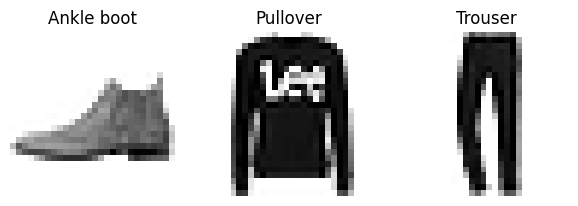

In [34]:
plt.figure(figsize=(7.2, 2.4))
for index, image in enumerate(X_new):
    plt.subplot(1, 3, index + 1)
    plt.imshow(image, cmap="binary", interpolation="nearest")
    plt.axis('off')
    plt.title(class_names[y_test[index]])
plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

In [35]:
housing = fetch_california_housing()
X_train_full,X_test,y_train_full,y_test = train_test_split(housing.data,housing.target,random_state=42)
X_train,X_valid,y_train,y_valid = train_test_split(X_train_full,y_train_full,random_state=42)

In [36]:
tf.random.set_seed(42)
norm_layer = tf.keras.layers.Normalization(input_shape=X_train.shape[1:])
model = tf.keras.Sequential([
    norm_layer,
    tf.keras.layers.Dense(50,activation='relu'),
    tf.keras.layers.Dense(50,activation='relu'),
    tf.keras.layers.Dense(50,activation='relu'),
    tf.keras.layers.Dense(1)
])
model.summary()
optimizer = tf.keras.optimizers.Adam(learning_rate=1e-3)
model.compile(loss='mse',optimizer=optimizer,metrics=['RootMeanSquaredError'])
norm_layer.adapt(X_train)
history = model.fit(X_train,y_train,epochs=20,
                    validation_data=(X_test,y_test))
mse_test,rmse_test = model.evaluate(X_test,y_test)
X_new = X_test[:3]
y_pred = model.predict(X_new)
rmse_test
y_pred

c:\Users\utkar\OneDrive\Desktop\Machine-learning-book\.ai\Lib\site-packages\keras\src\layers\preprocessing\tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ normalization (Normalization)   │ (None, 8)              │            17 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 50)             │           450 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 50)             │         2,550 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 50)             │         2,550 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 5,618 (21.95 KB)

 Trainable params: 5,601 (21.88 KB)

 Non-trainable params: 17 (72.00 B)

Epoch 1/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - RootMeanSquaredError: 0.9472 - loss: 0.8973 - val_RootMeanSquaredError: 0.6314 - val_loss: 0.3987
Epoch 2/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - RootMeanSquaredError: 0.6159 - loss: 0.3794 - val_RootMeanSquaredError: 0.5871 - val_loss: 0.3447
Epoch 3/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - RootMeanSquaredError: 0.5879 - loss: 0.3456 - val_RootMeanSquaredError: 0.5738 - val_loss: 0.3292
Epoch 4/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - RootMeanSquaredError: 0.5755 - loss: 0.3312 - val_RootMeanSquaredError: 0.5665 - val_loss: 0.3209
Epoch 5/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - RootMeanSquaredError: 0.5665 - loss: 0.3209 - val_RootMeanSquaredError: 0.5623 - val_loss: 0.3161
Epoch 6/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - RootMeanSquaredError: 0.5602 - loss: 0.3138 - val_RootMeanSquaredError: 0.5591 - val_loss: 0.3125
Epoch 7/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - RootMeanSquaredError: 0.5553 - los

array([[0.5307437],
       [1.1880982],
       [4.7818775]], dtype=float32)

In [37]:
rmse_test

0.5402362942695618

In [38]:
tf.keras.backend.clear_session()
tf.random.set_seed(42)

In [39]:
normalization_layer = tf.keras.layers.Normalization()
hidden_layer1 = tf.keras.layers.Dense(30,activation='relu')
hidden_layer2 = tf.keras.layers.Dense(30,activation='relu')
concat_layer = tf.keras.layers.Concatenate()
output_layer = tf.keras.layers.Dense(1)

input_ = tf.keras.layers.Input(shape=X_train.shape[1:])
normalized = normalization_layer(input_)
hidden1 = hidden_layer1(normalized)
hidden2 = hidden_layer2(hidden1)
concat = concat_layer([normalized,hidden2])
output = output_layer(concat)

model = tf.keras.Model(inputs=[input_],outputs=[output])

In [40]:
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 8)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ normalization       │ (None, 8)         │         17 │ input_layer[0][0] │
│ (Normalization)     │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense (Dense)       │ (None, 30)        │        270 │ normalization[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_1 (Dense)     │ (None, 30)        │        930 │ dense[0][0]       │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate         │ (None, 38)        │          0 │ normalization[0]… │
│ (Concatenate)       │                   │            │ dense_1[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_2 (Dense)     │ (None, 1)         │         39 │ concatenate[0][0] │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 1,256 (4.91 KB)

 Trainable params: 1,239 (4.84 KB)

 Non-trainable params: 17 (72.00 B)

In [41]:
input_wide = tf.keras.layers.Input(shape=[5]) # features 0 to 4
input_deep = tf.keras.layers.Input(shape=[6]) # features 2 to 7
norm_layer_wide = tf.keras.layers.Normalization()
norm_layer_deep = tf.keras.layers.Normalization()
norm_wide = norm_layer_wide(input_wide)
norm_deep = norm_layer_deep(input_deep)
hidden1 = tf.keras.layers.Dense(30,activation='relu')(norm_deep)
hidden2 = tf.keras.layers.Dense(30,activation='relu')(hidden1)
concat = tf.keras.layers.concatenate([norm_wide,hidden2])
output = tf.keras.layers.Dense(1)(concat)
model = tf.keras.Model(inputs=[input_wide,input_deep],outputs=[output])

In [42]:
model.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_2       │ (None, 6)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ normalization_2     │ (None, 6)         │         13 │ input_layer_2[0]… │
│ (Normalization)     │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ input_layer_1       │ (None, 5)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_3 (Dense)     │ (None, 30)        │        210 │ normalization_2[… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ normalization_1     │ (None, 5)         │         11 │ input_layer_1[0]… │
│ (Normalization)     │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_4 (Dense)     │ (None, 30)        │        930 │ dense_3[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate_1       │ (None, 35)        │          0 │ normalization_1[… │
│ (Concatenate)       │                   │            │ dense_4[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_5 (Dense)     │ (None, 1)         │         36 │ concatenate_1[0]… │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 1,200 (4.70 KB)

 Trainable params: 1,176 (4.59 KB)

 Non-trainable params: 24 (104.00 B)

In [43]:
optimizer = tf.keras.optimizers.Adam(learning_rate=1e-3)
model.compile(loss='mse',optimizer=optimizer,metrics=['RootMeanSquaredError'])

X_train_wide,X_train_deep = X_train[:,:5],X_train[:,2:]
X_valid_wide,X_valid_deep = X_valid[:,:5],X_valid[:,2:]
X_test_wide,X_test_deep  = X_test[:,:5],X_test[:,2:]
X_new_wide,X_new_deep = X_test_wide[:3],X_test_deep[:3]

norm_layer_wide.adapt(X_train_wide)
norm_layer_deep.adapt(X_train_deep)
history = model.fit((X_train_wide,X_train_deep),y_train,epochs=20,
                    validation_data = ((X_valid_wide,X_valid_deep),y_valid))
mse_test = model.evaluate((X_test_wide,X_test_deep),y_test)
y_pred = model.predict((X_new_wide,X_new_deep))

Epoch 1/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - RootMeanSquaredError: 1.2541 - loss: 1.5726 - val_RootMeanSquaredError: 1.1086 - val_loss: 1.2291
Epoch 2/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - RootMeanSquaredError: 0.6902 - loss: 0.4764 - val_RootMeanSquaredError: 0.6400 - val_loss: 0.4096
Epoch 3/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - RootMeanSquaredError: 0.6459 - loss: 0.4172 - val_RootMeanSquaredError: 0.6899 - val_loss: 0.4760
Epoch 4/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - RootMeanSquaredError: 0.6333 - loss: 0.4011 - val_RootMeanSquaredError: 0.6440 - val_loss: 0.4148
Epoch 5/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - RootMeanSquaredError: 0.6237 - loss: 0.3890 - val_RootMeanSquaredError: 0.5985 - val_loss: 0.3582
Epoch 6/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - RootMeanSquaredError: 0.6161 - loss: 0.3796 - val_RootMeanSquaredError: 0.6611 - val_loss: 0.4371
Epoch 7/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - RootMeanSquaredError: 0.6094 - los

In [44]:
tf.keras.backend.clear_session()
tf.random.set_seed(42)

In [45]:
input_wide = tf.keras.layers.Input(shape=[5])  # features 0 to 4
input_deep = tf.keras.layers.Input(shape=[6])  # features 2 to 7
norm_layer_wide = tf.keras.layers.Normalization()
norm_layer_deep = tf.keras.layers.Normalization()
norm_wide = norm_layer_wide(input_wide)
norm_deep = norm_layer_deep(input_deep)
hidden1 = tf.keras.layers.Dense(30, activation="relu")(norm_deep)
hidden2 = tf.keras.layers.Dense(30, activation="relu")(hidden1)
concat = tf.keras.layers.concatenate([norm_wide, hidden2])
output = tf.keras.layers.Dense(1)(concat)
aux_output = tf.keras.layers.Dense(1)(hidden2)
model = tf.keras.Model(inputs=[input_wide, input_deep],
                       outputs=[output, aux_output])

In [46]:
optimizer = tf.keras.optimizers.Adam(learning_rate=1e-3)
model.compile(loss=("mse", "mse"), loss_weights=(0.9, 0.1), optimizer=optimizer,
              metrics=["RootMeanSquaredError", "RootMeanSquaredError"])

In [47]:
norm_layer_wide.adapt(X_train_wide)
norm_layer_deep.adapt(X_train_deep)
history = model.fit(
    (X_train_wide, X_train_deep), (y_train, y_train), epochs=20,
    validation_data=((X_valid_wide, X_valid_deep), (y_valid, y_valid))
)

Epoch 1/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - dense_2_RootMeanSquaredError: 1.1260 - dense_2_loss: 1.2674 - dense_3_RootMeanSquaredError: 1.3859 - dense_3_loss: 1.9202 - loss: 1.3331 - val_dense_2_RootMeanSquaredError: 0.9299 - val_dense_2_loss: 0.8644 - val_dense_3_RootMeanSquaredError: 1.1851 - val_dense_3_loss: 1.4041 - val_loss: 0.9187
Epoch 2/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - dense_2_RootMeanSquaredError: 0.7112 - dense_2_loss: 0.5057 - dense_3_RootMeanSquaredError: 0.8530 - dense_3_loss: 0.7275 - loss: 0.5279 - val_dense_2_RootMeanSquaredError: 0.6589 - val_dense_2_loss: 0.4340 - val_dense_3_RootMeanSquaredError: 0.8730 - val_dense_3_loss: 0.7619 - val_loss: 0.4669
Epoch 3/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - dense_2_RootMeanSquaredError: 0.6537 - dense_2_loss: 0.4273 - dense_3_RootMeanSquaredError: 0.7670 - dense_3_loss: 0.5882 - loss: 0.4434 - val_dense_2_RootMeanSquaredError: 0.6791 - val_dense_2_loss: 0.4610 - val_dense_3_RootMeanSquaredError: 0.7

In [48]:
eval_result = model.evaluate((X_test_wide,X_test_deep),(y_test,y_test))
weighted_sum_of_losses, main_loss, aux_loss, main_rmse, aux_rmse = eval_result

162/162 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - dense_2_RootMeanSquaredError: 0.5741 - dense_2_loss: 0.3291 - dense_3_RootMeanSquaredError: 0.6184 - dense_3_loss: 0.3824 - loss: 0.3348  


In [49]:
y_pred_main,y_pred_aux = model.predict((X_new_wide,X_new_deep))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


In [50]:
y_pred_tuple = model.predict((X_new_wide,X_new_deep))
y_pred = dict(zip(model.output_names,y_pred_tuple))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


In [51]:
class WideAndDeepModel(tf.keras.Model):
    def __init__(self,units=30,activation='relu',**kwargs):
        super().__init__(**kwargs) #To support naming of the model
        self.norm_layer_wide = tf.keras.layers.Normalization()
        self.norm_layer_deep = tf.keras.layers.Normalization()
        self.hidden1 = tf.keras.layers.Dense(units, activation=activation)
        self.hidden2 = tf.keras.layers.Dense(units, activation=activation)
        self.main_output = tf.keras.layers.Dense(1)
        self.aux_output = tf.keras.layers.Dense(1)
    
    def call(self,inputs):
        input_wide,input_deep = inputs
        norm_wide = self.norm_layer_wide(input_wide)
        norm_deep = self.norm_layer_deep(input_deep)
        hidden1 = self.hidden1(norm_deep)
        hidden2 = self.hidden2(hidden1)
        concat = tf.keras.layers.concatenate([norm_wide,hidden2])
        output = self.main_output(concat)
        aux_output = self.aux_output(hidden2)
        return output,aux_output
model = WideAndDeepModel(30,activation='relu',name='my_cool_model')

In [57]:
optimizer = tf.keras.optimizers.Adam(learning_rate=1e-3)
model.compile(loss=["mse", "mse"], loss_weights=[0.9, 0.1], optimizer=optimizer,
              metrics=["RootMeanSquaredError", "RootMeanSquaredError"])
model.norm_layer_wide.adapt(X_train_wide)
model.norm_layer_deep.adapt(X_train_deep)
history = model.fit(
    (X_train_wide, X_train_deep), (y_train, y_train), epochs=10,
    validation_data=((X_valid_wide, X_valid_deep), (y_valid, y_valid)))
eval_results = model.evaluate((X_test_wide, X_test_deep), (y_test, y_test))
y_pred_main, y_pred_aux = model.predict((X_new_wide, X_new_deep))

Epoch 1/10
363/363 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - RootMeanSquaredError: 1.1789 - RootMeanSquaredError_1: 1.5458 - loss: 1.4898 - mse_loss: 2.3889 - val_RootMeanSquaredError: 1.0930 - val_RootMeanSquaredError_1: 4.8811 - val_loss: 3.4577 - val_mse_loss: 23.8135
Epoch 2/10
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - RootMeanSquaredError: 0.7019 - RootMeanSquaredError_1: 1.0063 - loss: 0.5447 - mse_loss: 1.0126 - val_RootMeanSquaredError: 0.6449 - val_RootMeanSquaredError_1: 2.9652 - val_loss: 1.2536 - val_mse_loss: 8.7883
Epoch 3/10
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - RootMeanSquaredError: 0.6562 - RootMeanSquaredError_1: 0.8244 - loss: 0.4555 - mse_loss: 0.6796 - val_RootMeanSquaredError: 0.6766 - val_RootMeanSquaredError_1: 2.0092 - val_loss: 0.8158 - val_mse_loss: 4.0351
Epoch 4/10
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - RootMeanSquaredError: 0.6366 - RootMeanSquaredError_1: 0.7866 - loss: 0.4266 - mse_loss: 0.6188 - val_RootMeanSquaredError: 0.6186 - val_RootMeanSquaredE

In [58]:
model.save('my_keras_model.keras')

In [59]:
model.save_weights("my_weights.weights.h5")

In [60]:
model.load_weights("my_weights.weights.h5")

In [61]:
loaded_model = tf.keras.models.load_model(
    "my_keras_model.keras",
    custom_objects={"WideAndDeepModel": WideAndDeepModel}
)

In [62]:
y_pred_main,y_pred_aux = loaded_model.predict((X_new_wide,X_new_deep))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step


In [64]:
checkpoint_cb = tf.keras.callbacks.ModelCheckpoint('my_checkpoints.weights.h5',
                                                   save_weights_only=True)
early_stopping_cb = tf.keras.callbacks.EarlyStopping(patience=10,
                                                     restore_best_weights=True)
history = model.fit(
    (X_train_wide,X_train_deep),(y_train,y_train), epochs=10,
    validation_data = ((X_valid_wide,X_valid_deep),(y_valid,y_valid)),
    callbacks = [checkpoint_cb,early_stopping_cb]
)

Epoch 1/10
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - RootMeanSquaredError: 0.6121 - RootMeanSquaredError_1: 0.6666 - loss: 0.3817 - mse_loss: 0.4444 - val_RootMeanSquaredError: 1.5885 - val_RootMeanSquaredError_1: 0.6557 - val_loss: 2.3141 - val_mse_loss: 0.4299
Epoch 2/10
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - RootMeanSquaredError: 0.5996 - RootMeanSquaredError_1: 0.6606 - loss: 0.3672 - mse_loss: 0.4364 - val_RootMeanSquaredError: 1.5094 - val_RootMeanSquaredError_1: 1.2913 - val_loss: 2.2174 - val_mse_loss: 1.6669
Epoch 3/10
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - RootMeanSquaredError: 0.6003 - RootMeanSquaredError_1: 0.6582 - loss: 0.3677 - mse_loss: 0.4333 - val_RootMeanSquaredError: 1.5652 - val_RootMeanSquaredError_1: 0.8704 - val_loss: 2.2807 - val_mse_loss: 0.7574
Epoch 4/10
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - RootMeanSquaredError: 0.6035 - RootMeanSquaredError_1: 0.6583 - loss: 0.3711 - mse_loss: 0.4334 - val_RootMeanSquaredError: 1.7117 - val_RootMeanSquaredEr

In [67]:
class PrintValTrainRatioCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self,epoch,logs):
        ratio = logs['val_loss'] / logs['loss']
        print(f'Epoch={epoch},val/train = {ratio:.2f}')

In [68]:
val_train_ratio_cb = PrintValTrainRatioCallback()
history=model.fit(
    (X_train_wide,X_train_deep),(y_train,y_train),epochs=10,
    validation_data=((X_valid_wide,X_valid_deep),(y_valid,y_valid)),
    callbacks=[val_train_ratio_cb],verbose=0
)

Epoch=0,val/train = 3.24
Epoch=1,val/train = 4.00
Epoch=2,val/train = 3.06
Epoch=3,val/train = 3.11
Epoch=4,val/train = 2.02
Epoch=5,val/train = 2.22
Epoch=6,val/train = 2.10
Epoch=7,val/train = 2.59
Epoch=8,val/train = 2.74
Epoch=9,val/train = 3.06


In [85]:
from pathlib import Path
from time import strftime

def get_run_logdir(root_logdir='my_logs'):
    return Path(root_logdir) / strftime('run_%Y_%m_%d_%H_%M_%S')
run_logdir = get_run_logdir()

In [86]:
tf.keras.backend.clear_session()
tf.random.set_seed(42)

In [87]:
norm_layer = tf.keras.layers.Normalization(input_shape=X_train.shape[1:])
model = tf.keras.Sequential([
    norm_layer,
    tf.keras.layers.Dense(30,activation='relu'),
    tf.keras.layers.Dense(30,activation='relu'),
    tf.keras.layers.Dense(1)
])
optimizer = tf.keras.optimizers.SGD(learning_rate = 1e-3)
model.compile(loss='mse',optimizer=optimizer,metrics=['RootMeanSquaredError'])
norm_layer.adapt(X_train)

c:\Users\utkar\OneDrive\Desktop\Machine-learning-book\.ai\Lib\site-packages\keras\src\layers\preprocessing\tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [88]:
tensorboard_cb = tf.keras.callbacks.TensorBoard(run_logdir,
                                                profile_batch=(100,200))
history = model.fit(X_train,y_train,epochs=30,
                    validation_data=(X_valid,y_valid),
                    callbacks=[tensorboard_cb])

Epoch 1/30
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - RootMeanSquaredError: 1.6808 - loss: 2.8250 - val_RootMeanSquaredError: 2.4852 - val_loss: 6.1764
Epoch 2/30
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - RootMeanSquaredError: 0.9923 - loss: 0.9847 - val_RootMeanSquaredError: 0.9092 - val_loss: 0.8267
Epoch 3/30
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - RootMeanSquaredError: 0.8891 - loss: 0.7905 - val_RootMeanSquaredError: 0.8569 - val_loss: 0.7343
Epoch 4/30
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - RootMeanSquaredError: 0.8520 - loss: 0.7260 - val_RootMeanSquaredError: 0.8244 - val_loss: 0.6797
Epoch 5/30
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - RootMeanSquaredError: 0.8252 - loss: 0.6809 - val_RootMeanSquaredError: 0.8001 - val_loss: 0.6401
Epoch 6/30
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - RootMeanSquaredError: 0.8021 - loss: 0.6434 - val_RootMeanSquaredError: 0.7785 - val_loss: 0.6061
Epoch 7/30
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - RootMeanSquaredError: 0.7813 - los

In [90]:
print("my_logs")
for path in sorted(Path('my_logs').glob("**/*")):
    print(" "*(len(path.parts)-1)+path.parts[-1])

my_logs
 run_2025_10_26_06_33_43
  train
   events.out.tfevents.1761441027.UTKARSH.29276.0.v2
   events.out.tfevents.1761441055.UTKARSH.29276.1.v2
   events.out.tfevents.1761441551.UTKARSH.29276.3.v2
   plugins
    profile
     2025_10_26_01_10_56
      UTKARSH.xplane.pb
     2025_10_26_01_19_12
      UTKARSH.xplane.pb
  validation
   events.out.tfevents.1761441056.UTKARSH.29276.2.v2
   events.out.tfevents.1761441552.UTKARSH.29276.4.v2
 run_2025_10_26_06_54_33
  train
   events.out.tfevents.1761441896.UTKARSH.29276.5.v2
   plugins
    profile
     2025_10_26_01_24_56
      UTKARSH.xplane.pb
  validation
   events.out.tfevents.1761441897.UTKARSH.29276.6.v2


In [91]:
%load_ext tensorboard
%tensorboard --logdir=./my_logs

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


Reusing TensorBoard on port 6006 (pid 4052), started 0:11:23 ago. (Use '!kill 4052' to kill it.)

In [92]:
test_logdir = get_run_logdir()
writer = tf.summary.create_file_writer(str(test_logdir))
with writer.as_default():
    for step in range(1, 1000 + 1):
        tf.summary.scalar('my_scalar',np.sin(step/10),step=step)

        data = (np.random.randn(100)+2) * step / 100
        tf.summary.histogram('my_hist',data,buckets=50,step=step)

        images = np.random.rand(2,32,32,3) * step / 1000
        tf.summary.image('my_images',images,step=step)

        texts = ['The step is' + str(step),'Its square is' + str(step**2)]
        tf.summary.text('my_text',texts,step=step)

        sine_wave = tf.math.sin(tf.range(12000)/48000 * 2 * np.pi * step)
        audio = tf.reshape(tf.cast(sine_wave,tf.float32),[1,-1,1])
        tf.summary.audio('my_audio',audio,sample_rate=48000,step=step)

In [93]:
from tensorboard import notebook

notebook.list()

Known TensorBoard instances:
  - port 6006: logdir ./my_logs (started 0:20:24 ago; pid 4052)


In [100]:
!taskkill /F /PID 4052

SUCCESS: The process with PID 4052 has been terminated.


In [121]:
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist
X_train, y_train = X_train_full[:-5000], y_train_full[:-5000]
X_valid, y_valid = X_train_full[-5000:], y_train_full[-5000:]

In [122]:
tf.keras.backend.clear_session()
tf.random.set_seed(42)

In [123]:
import keras_tuner as kt

def build_model(hp):
    n_hidden = hp.Int('n_hidden',min_value=0,max_value=8,default=2)
    n_neurons = hp.Int('n_neurons',min_value=16,max_value=256)
    learning_rate = hp.Float('learning_rate',min_value=1e-4,max_value=1e-2,
                             sampling='log')
    optimizer = hp.Choice('optimizer',values=['sgd','adam'])
    if optimizer=='sgd':
        optimizer = tf.keras.optimizers.SGD(learning_rate=learning_rate)
    else:
        optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)
    
    model = tf.keras.Sequential()
    model.add(tf.keras.layers.Flatten())
    for _ in range(n_hidden):
        model.add(tf.keras.layers.Dense(n_neurons,activation='relu'))
    model.add(tf.keras.layers.Dense(10,activation='softmax'))
    model.compile(loss='sparse_categorical_crossentropy',optimizer=optimizer,
                  metrics=['accuracy'])
    return model

In [124]:
random_search_tuner = kt.RandomSearch(
    build_model, objective='val_accuracy', max_trials=5,overwrite=True,
    directory='my_fashion_mnist',project_name='my_rnd_search',seed=42
    )
random_search_tuner.search(X_train,y_train,epochs=10,
                           validation_data=(X_valid,y_valid))

Trial 5 Complete [00h 00m 21s]
val_accuracy: 0.8348000049591064

Best val_accuracy So Far: 0.8560000061988831
Total elapsed time: 00h 01m 46s


In [125]:
top3_models = random_search_tuner.get_best_models(num_models=3)
best_model = top3_models[0]

In [126]:
top3_params = random_search_tuner.get_best_hyperparameters(num_trials=3)
top3_params[0].values

{'n_hidden': 7,
 'n_neurons': 100,
 'learning_rate': 0.0012482904754698163,
 'optimizer': 'sgd'}

In [127]:
best_trial = random_search_tuner.oracle.get_best_trials(num_trials=1)[0]
best_trial.summary()

Trial 1 summary
Hyperparameters:
n_hidden: 7
n_neurons: 100
learning_rate: 0.0012482904754698163
optimizer: sgd
Score: 0.8560000061988831


In [128]:
best_trial.metrics.get_last_value('val_accuracy')

np.float64(0.8560000061988831)

In [129]:
best_model.fit(X_train_full,y_train_full,epochs=10)
test_loss,test_accuracy = best_model.evaluate(X_test,y_test)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8784 - loss: 0.3304
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8827 - loss: 0.3186
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8866 - loss: 0.3068
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8897 - loss: 0.2974
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8925 - loss: 0.2898
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8948 - loss: 0.2820
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8977 - loss: 0.2750
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9008 - loss: 0.2678
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9023 - loss: 0.2623
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9047 - loss: 0.2566
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8556 - loss: 0.4214  


In [130]:
class MyClassificationHyperModel(kt.HyperModel):
    def build(self,hp):
        return build_model(hp)
    def fit(self,hp,model,X,y, **kwargs):
        if hp.Boolean('normalize'):
            norm_layer = tf.keras.layers.Normalization()
            X = norm_layer(X)
        return model.fit(X,y,**kwargs)

In [131]:
hyperband_tuner = kt.Hyperband(
    MyClassificationHyperModel(),objective='val_accuracy',seed=42,
    max_epochs=10, factor=3, hyperband_iterations=2,
    overwrite=True, directory='my_fashion_mnist',project_name='hyperband'
)

In [132]:
root_logdir = Path(hyperband_tuner.project_dir)/'tensorboard'
tensorboard_cb =tf.keras.callbacks.TensorBoard(root_logdir)
early_stopping_cb = tf.keras.callbacks.EarlyStopping(patience=2)
hyperband_tuner.search(X_train,y_train,epochs=10,
                       validation_data=(X_valid,y_valid),
                       callbacks=[early_stopping_cb,tensorboard_cb])

Trial 60 Complete [00h 00m 23s]
val_accuracy: 0.8511999845504761

Best val_accuracy So Far: 0.8705999851226807
Total elapsed time: 00h 12m 28s


In [138]:
%tensorboard --logdir my_fashion_mnist/hyperband/tensorboard

Reusing TensorBoard on port 6008 (pid 29004), started 0:00:09 ago. (Use '!kill 29004' to kill it.)

In [140]:
bayesian_opt_tuner = kt.BayesianOptimization(
    MyClassificationHyperModel(),objective='val_accuracy',seed=42,
    max_trials=10,alpha=1e-4,beta=2.6,
    overwrite=True,directory='my_fashion_mnist',project_name='bayesian_opt'
)

In [141]:
bayesian_opt_tuner.search(X_train,y_train,epochs=10,
                          validation_data=(X_valid,y_valid),
                          callbacks=[early_stopping_cb])

Trial 10 Complete [00h 00m 24s]
val_accuracy: 0.8324000239372253

Best val_accuracy So Far: 0.8546000123023987
Total elapsed time: 00h 03m 24s


In [ ]:
from tensorboard import notebook
notebook.list()

Known TensorBoard instances:
  - port 6007: logdir {my_fashion_mnist/hyperband/tensorboard} (started 0:20:53 ago; pid 26740)
  - port 6008: logdir my_fashion_mnist/hyperband/tensorboard (started 0:20:31 ago; pid 29004)
  - port 6006: logdir my_fashion_mnisthyperbandtensorboard (started 0:22:45 ago; pid 29320)
  - port 6006: logdir ./my_logs (started 2:10:15 ago; pid 4052)


In [144]:
!taskkill /F /PID 29320

SUCCESS: The process with PID 29320 has been terminated.
